In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import tensorflow as tf


In [2]:
dffeatures = pd.read_csv('../input/jane-street-market-prediction/features.csv') # features
data = pd.read_csv('../input/jane-street-market-prediction/train.csv') # train
dffeatures = dffeatures.dropna()
data = data.dropna()
dftrain = data.sample(frac=0.7,random_state=200)
dfeval = data.drop(dftrain.index)


In [3]:
dftrain_processed = dftrain


In [4]:
dftrain_processed.pop('date')
dftrain_processed.pop('weight')
dftrain_processed.pop('ts_id')
dftrain_processed.pop('resp')
dftrain_processed.pop('resp_1')
dftrain_processed.pop('resp_2')
dftrain_processed.pop('resp_3')
dftrain_processed.pop('resp_4')

523010    -0.018288
202372    -0.002313
621746    -0.008988
2254521   -0.007338
180695     0.022424
             ...   
327282     0.124459
2120974    0.008365
2274207   -0.019555
2086510   -0.036279
881464    -0.008595
Name: resp_4, Length: 1395360, dtype: float64

In [5]:
scaled_data = preprocessing.scale(dftrain_processed)


In [6]:
pca = PCA()
pca.fit(scaled_data.T)
pca_data = pca.transform(scaled_data.T)

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100 ,decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(scaled_data.T) + 1)]

In [8]:
pca_df = pd.DataFrame(pca_data)

In [9]:
cvec=[]
for iter in range(0,26):
    cvec.append('red')
    cvec.append('green')
    cvec.append('blue')
    cvec.append('yellow')
    cvec.append('black')

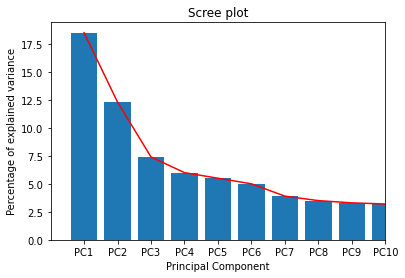

In [10]:
plt.bar(x=range(1,len(scaled_data.T) + 1),height = per_var,tick_label = labels)
plt.plot([iter for iter in range(1,len(scaled_data.T) + 1)], per_var,color='red')

plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
axes = plt.gca()
axes.set_xlim([0,10])
plt.show()

Text(0, 0.5, 'PC3 -7.4%')

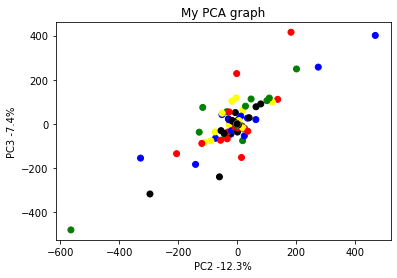

In [11]:
plt.scatter(pca_df.loc[1],pca_df.loc[2],c=cvec)
plt.title('My PCA graph')
plt.xlabel('PC2 -{0}%'.format(per_var[1]))
plt.ylabel('PC3 -{0}%'.format(per_var[2]))